# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice
len(combined["Mouse ID"].unique())

249

In [3]:
combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [ ]:
new_data = combined.drop(['Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],axis = 1)
new_data.head()

In [ ]:
new_data1 = new_data.drop_duplicates()
new_data1

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
combined[combined["Mouse ID"].duplicated(keep=False)]

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

Mouse ID              object
Timepoint              int64
Tumor Volume (mm3)     int64
Metastatic Sites       int64
Drug Regimen          object
Sex                   object
Age_months             int64
Weight (g)             int64
dtype: object

In [61]:
# Generate a summar statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_1 = combined.set_index(['Drug Regimen'])

combined_1['Tumor Volume (mm3)'] = combined_1['Tumor Volume (mm3)'].astype(np.int64)
mean = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
median = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
variance = combined_1.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
STD = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
sem = combined_1.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

In [63]:
regimen_summary = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance, \
                               "Tumor Volume Std. Dev.":STD,"Tumor Volume Std.Err.":sem})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.213043,41.0,25.513366,5.051076,0.333058
Ceftamin,52.157303,51.0,38.347997,6.192576,0.464153
Infubinol,52.466292,51.0,42.114677,6.489582,0.486415
Ketapril,54.803191,53.0,67.816674,8.235088,0.600606
Naftisol,53.924731,52.0,64.610520,8.038067,0.589380
Placebo,53.607735,52.0,60.473051,7.776442,0.578018
Propriva,51.888199,50.0,41.087422,6.409947,0.505175
Ramicane,39.780702,40.0,24.022181,4.901243,0.324593
Stelasyn,53.823204,52.0,58.468570,7.646474,0.568358


In [64]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
regimen2 = combined_1.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
regimen2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.213043,41.0,25.513366,5.051076,0.333058
Ceftamin,52.157303,51.0,38.347997,6.192576,0.464153
Infubinol,52.466292,51.0,42.114677,6.489582,0.486415
Ketapril,54.803191,53.0,67.816674,8.235088,0.600606
Naftisol,53.924731,52.0,64.610520,8.038067,0.589380
Placebo,53.607735,52.0,60.473051,7.776442,0.578018
Propriva,51.888199,50.0,41.087422,6.409947,0.505175
Ramicane,39.780702,40.0,24.022181,4.901243,0.324593
Stelasyn,53.823204,52.0,58.468570,7.646474,0.568358


## Bar and Pie Charts

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

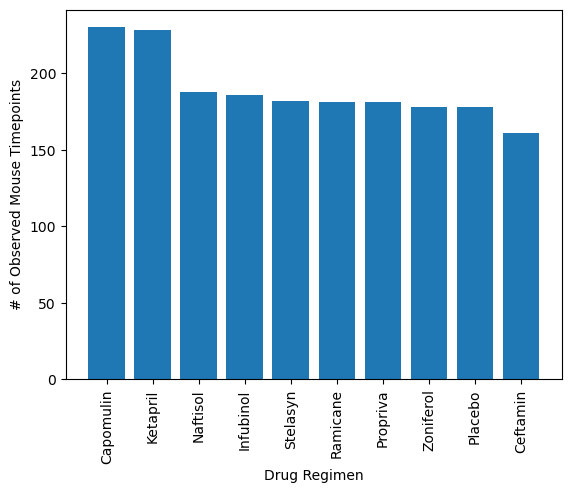

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = combined["Drug Regimen"].value_counts()
x = combined['Drug Regimen'].unique()
plt.bar(x,counts,alpha=1)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


([<matplotlib.patches.Wedge at 0x2545c2692d0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

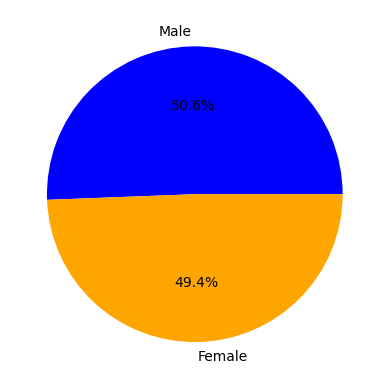

In [85]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = combined["Sex"].value_counts()
explode = (0,0)
labels = ('Male','Female')
colors = ('Blue','Orange')
# Make the pie chart
plt.pie(sex_counts,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%")

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

maximums = combined.groupby(['Mouse ID', 'Tumor Volume (mm3)'], as_index=False)['Timepoint'].max(['Timepoint'])

maximums
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Tumor Volume (mm3),Timepoint
0,a203,45.000000,0
1,a203,48.508468,5
2,a203,51.852437,10
3,a203,52.777870,15
4,a203,55.173336,20
...,...,...,...
1887,z969,63.145652,25
1888,z969,65.841013,30
1889,z969,69.176246,35
1890,z969,70.314904,40


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
